<h1>Citibike Network Assignment</h1>
<li>The file, 201809-citibike-tripdata.csv, contains citibike trip data from September 2018 (a reasonable sized file!)
<li>The data:<br>
"tripduration","starttime","stoptime","start station id","start station name","start station latitude","start station longitude","end station id","end station name","end station latitude","end station longitude","bikeid","usertype","birth year","gender"
<li>Each record in the data is a trip 
<li>The data is described at https://www.citibikenyc.com/system-data

<h1>STEP 1: Read the data into a dataframe</h1>
<li>Convert station ids to str if necessary

In [1]:
import pandas as pd
import numpy as np
import networkx as nx
datafile = '201801-citibike-tripdata.csv'
df = pd.read_csv(datafile)


In [2]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

<h1>STEP 2: Basic cleaning</h1>
<li>Remove data that have any nans in any row (none in this file but others do have nans)
<li>And convert stationids to str 

In [3]:
df.dropna()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,970,50:57.4,07:08.2,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,33:30.2,45:33.3,72,W 52 St & 11 Ave,40.767272,-73.993929,3255,8 Ave & W 31 St,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,39:18.3,47:35.2,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,40:13.4,45:20.2,72,W 52 St & 11 Ave,40.767272,-73.993929,447,8 Ave & W 52 St,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,14:51.6,19:57.6,72,W 52 St & 11 Ave,40.767272,-73.993929,3356,Amsterdam Ave & W 66 St,40.774667,-73.984706,30319,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
718989,843,28:27.5,42:30.6,3664,North Moore St & Greenwich St,40.720195,-74.010301,410,Suffolk St & Stanton St,40.720664,-73.985180,15153,Subscriber,1981,1
718990,244,34:20.5,38:24.7,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,26896,Subscriber,1960,1
718991,302,20:55.5,25:58.3,3664,North Moore St & Greenwich St,40.720195,-74.010301,327,Vesey Pl & River Terrace,40.715338,-74.016584,33111,Subscriber,1965,1
718992,222,47:42.6,51:24.7,3664,North Moore St & Greenwich St,40.720195,-74.010301,257,Lispenard St & Broadway,40.719392,-74.002472,16675,Subscriber,1969,0


<h1>STEP 3: Write a function that returns a graph given a citibike data frame</h1> 
<li>Your function should return two things:
<ol>
<li>a graph
<li>a dictionary with station ids as the key and station name as the value
</ol>
<li>The graph should contain 
<ol>
<li>nodes (station ids)
<li>edges (station id, station id)
<li>edge data 
<ol>
<li>count: number of trips on the edge
<li>time: average duration - pickup to dropoff - on that edge
</ol>
</ol>
<li><b>Note:</b> the edge (x1,y1) is the same as (y1,x1) even though the start station ids and end station ids are flipped in the dataframe

In [4]:
def get_citibike_graph(df):
    
    #WRITE YOUR CODE HERE
    nodes=set()
    edges=set()
    node_names={}
    for i in df.index:
        if df.loc[i, 'start station id'] not in nodes:
            nodes.add(df.loc[i, 'start station id'])
            node_names[df.loc[i, 'start station id']]=df.loc[i, 'start station name']
        if df.loc[i, 'end station id'] not in nodes:
            nodes.add(df.loc[i, 'end station id'])
            node_names[df.loc[i, 'end station id']]=df.loc[i, 'end station name']
        if (df.loc[i, 'start station id'], df.loc[i, 'end station id']) not in edges and (df.loc[i, 'end station id'], df.loc[i, 'start station id']) not in edges:
            edges.add((df.loc[i, 'start station id'], df.loc[i, 'end station id']))
    G = nx.Graph()
    edge_list=list(edges)
    
    #remove self-cycle:
    for i in edge_list:
        if i[0]==i[1]:
            edge_list.remove(i)
            
    nodes = nodes
    edges = edge_list
    #print(nodes)
    G.add_edges_from(edges)
    #nx.draw(G)
    return G,node_names

<h1>STEP 4: Create the following graphs using the function above</h1>
<li>G: A graph of all the data in the dataframe
<li>m_G: A graph containing only data from male riders
<li>f_G: A graph containing only data from female riders
<li>Note: for m_G and f_G you will need to extract data from the dataframe and male has gender=1; female has gender=2

In [5]:
G,nodes=get_citibike_graph(df)

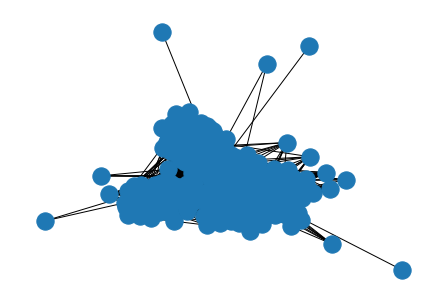

In [6]:
nx.draw(G)

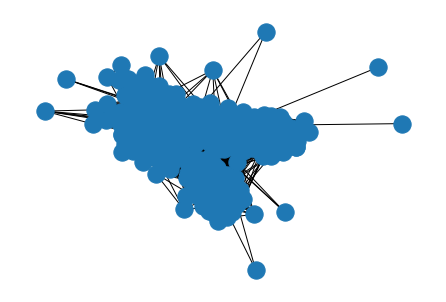

In [7]:
m_G,m_nodes=get_citibike_graph(df[df['gender']==1]) #Gender (Zero=unknown; 1=male; 2=female)
nx.draw(m_G)

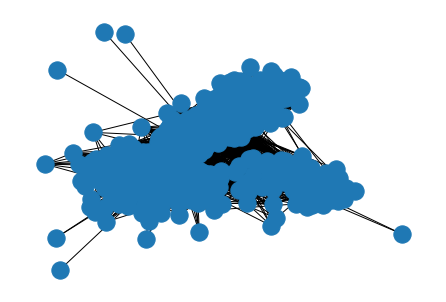

In [8]:
f_G,f_nodes=get_citibike_graph(df[df['gender']==2]) #Gender (Zero=unknown; 1=male; 2=female)
nx.draw(f_G)

<h1>STEP 5: Answer the following questions for each of the graphs</h1>
<ol>
Please answer the following questions for total_df, male_df & female_df:
<li>Which stations (name) are the best and worst connected (max degree)?
<li>Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs. Report both the two stations as well as the time in minutes
<li>Which edges are associated with the most and least number of trips?

Which stations (name) have the greatest and least number of connections (max degree)?

In [9]:
#G.degree() 
print('greatest number of connections:', max(list(G.degree()),key=lambda x : x[1]))
print('least number of connections:', min(list(G.degree()),key=lambda x : x[1]))

greatest number of connections: (519, 431)
least number of connections: (3428, 1)


In [10]:
print('greatest number of connections:', max(list(m_G.degree()),key=lambda x : x[1]))
print('least number of connections:', min(list(m_G.degree()),key=lambda x : x[1]))

greatest number of connections: (519, 411)
least number of connections: (3428, 1)


In [11]:
print('greatest number of connections:', max(list(f_G.degree()),key=lambda x : x[1]))
print('least number of connections:', min(list(f_G.degree()),key=lambda x : x[1]))

greatest number of connections: (519, 264)
least number of connections: (3485, 1)


Travel between which pair of stations is the longest in terms of average duration between bike pickups and dropoffs

In [61]:
#df[((df['start station id']==482) & (df['end station id']==72)) | 
#                                       ((df['start station id']==72) & (df['end station id']==482))]['tripduration'].mean()

In [19]:
def get_longest_duration(df):
    edges=set()
    for i in df.index:
        if (df.loc[i, 'start station id'], df.loc[i, 'end station id']) not in edges and (df.loc[i, 'end station id'], df.loc[i, 'start station id']) not in edges:
            edges.add((df.loc[i, 'start station id'], df.loc[i, 'end station id']))
    edge_list=list(edges)
    #remove self-cycle
    for i in edge_list:
        if i[0]==i[1]:
            edge_list.remove(i)
    #build duaration list:
    duration=[]
    for i in edge_list:
        d=df[((df['start station id']==i[0]) & (df['end station id']==i[1])) | 
                                       ((df['start station id']==i[1]) & (df['end station id']==i[0]))]['tripduration'].mean()
        duration.append((i[0], i[1], d/60))   
    
    return  max(duration,key=lambda x : x[2])

In [20]:
print('longest average duration:',get_longest_duration(df))

longest average duration: (3082, 144, 325167.48333333334)


In [39]:
print('longest average duration for male:',get_longest_duration(df[df['gender']==1]))

longest average duration for male: (3082, 144, 325167.48333333334)


In [40]:
print('longest average duration for female:',get_longest_duration(df[df['gender']==2]))

longest average duration for female: (270, 3652, 73698.81666666667)


Which edges are associated with the most and least number of trips?

In [46]:
def edge_with_most_least_trip(df):
    edges=set()
    for i in df.index:
        if (df.loc[i, 'start station id'], df.loc[i, 'end station id']) not in edges and (df.loc[i, 'end station id'], df.loc[i, 'start station id']) not in edges:
            edges.add((df.loc[i, 'start station id'], df.loc[i, 'end station id']))
    edge_list=list(edges)
    #remove self-cycle
    for i in edge_list:
        if i[0]==i[1]:
            edge_list.remove(i)
    #build nums list:
    nums=[]
    for i in edge_list:
        d=df[((df['start station id']==i[0]) & (df['end station id']==i[1])) | 
                                       ((df['start station id']==i[1]) & (df['end station id']==i[0]))]
        nums.append((i[0], i[1], len(d)))  
        
    return nums

In [47]:
df1=edge_with_most_least_trip(df)
print('edges associated with the most number of trips?', max(df1,key=lambda x : x[2]))
print('edges associated with the least number of trips?', min(df1,key=lambda x : x[2]))

edges associated with the most number of trips? (432, 3263, 700)
edges associated with the least number of trips? (3413, 3478, 1)


In [48]:
m_df=edge_with_most_least_trip(df[df['gender']==1])
print('edges associated with the most number of trips?', max(m_df,key=lambda x : x[2]))
print('edges associated with the least number of trips?', min(m_df,key=lambda x : x[2]))

edges associated with the most number of trips? (432, 3263, 533)
edges associated with the least number of trips? (3413, 3478, 1)


In [49]:
f_df=edge_with_most_least_trip(df[df['gender']==2])
print('edges associated with the most number of trips?', max(f_df,key=lambda x : x[2]))
print('edges associated with the least number of trips?', min(f_df,key=lambda x : x[2]))

edges associated with the most number of trips? (432, 3263, 161)
edges associated with the least number of trips? (455, 3173, 1)


<h2>Centrality</h2>
One of the concerns that the citibike system has to deal with is ensuring that no station has empty slots (a bike should always be available) and that no station should have no empty slots (you should be able to return a bike). To do this, it needs to monitor the movement of bikes through the system, ideally using a directed graph. Though our graph is not directed, we can look at some network characteristics that will help us answer these questions. Note that the "trips" feature in edge data captures flows.
<li>Which node is a possible bottleneck node in terms of bike flows?
<li>Which node is the "nearest" to all other nodes (irrespective of flows)?
<li>Which node is the "nearest" to all other nodes (in terms of distance = time)?


In [21]:
from networkx.algorithms import closeness_centrality
from networkx.algorithms import communicability

In [24]:
#build a new function that generate the graph with average duration in it
def get_citibike_graph_include_duration(df):
    
    #WRITE YOUR CODE HERE
    nodes=set()
    edges=set()
    node_names={}
    for i in df.index:
        if df.loc[i, 'start station id'] not in nodes:
            nodes.add(df.loc[i, 'start station id'])
            node_names[df.loc[i, 'start station id']]=df.loc[i, 'start station name']
        if df.loc[i, 'end station id'] not in nodes:
            nodes.add(df.loc[i, 'end station id'])
            node_names[df.loc[i, 'end station id']]=df.loc[i, 'end station name']
        if (df.loc[i, 'start station id'], df.loc[i, 'end station id']) not in edges and (df.loc[i, 'end station id'], df.loc[i, 'start station id']) not in edges:
            edges.add((df.loc[i, 'start station id'], df.loc[i, 'end station id']))
    G = nx.Graph()
    edge_list=list(edges)
    
    #remove self-cycle
    for i in edge_list:
        if i[0]==i[1]:
            edge_list.remove(i)
    
    #build duaration list:
    duration=[]
    for i in edge_list:
        duration.append((i[0], i[1], df[((df['start station id']==i[0]) & (df['end station id']==i[1])) | 
                                       ((df['start station id']==i[1]) & (df['end station id']==i[0]))]['tripduration'].mean()))    
    nodes = nodes
    for d in duration:
        G.add_edge(d[0],d[1],distance=d[2])
    
    #nx.draw(G)
    return G,node_names


Which node is a possible bottleneck node in terms of bike flows?

In [26]:
G_d, node_names_d=get_citibike_graph_include_duration(df)

In [35]:
b_c=nx.betweenness_centrality(G_d,weight='distance')
max_key=max(b_c, key=lambda x: b_c[x])
print('Which node is a possible bottleneck node in terms of bike flows?',(max_key, b_c[max_key]))

Which node is a possible bottleneck node in terms of bike flows? (3129, 0.055780298104938716)


Which node is the "nearest" to all other nodes (irrespective of flows)?

In [36]:
c_c=nx.closeness_centrality(G)
max_key=max(c_c, key=lambda x: c_c[x])
print('Which node is the nearest to all other nodes (irrespective of flows)',(max_key, c_c[max_key]))

Which node is the nearest to all other nodes (irrespective of flows) (519, 0.6955332725615314)


Which node is the "nearest" to all other nodes (in terms of distance = time)?

In [38]:
c_c2=nx.closeness_centrality(G_d,distance='distance')
max_key=max(c_c2, key=lambda x: c_c2[x])
print('Which node is the "nearest" to all other nodes (in terms of distance = time)?',(max_key, c_c2[max_key]))

Which node is the "nearest" to all other nodes (in terms of distance = time)? (439, 0.00013277000747610227)
